In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from PIL import Image
from IPython.display import display

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/ukraine-ml-bootcamp-2023
/kaggle/input/ukraine-ml-bootcamp-2023/images
/kaggle/input/ukraine-ml-bootcamp-2023/images/train_images
/kaggle/input/ukraine-ml-bootcamp-2023/images/test_images


**Data**

In [13]:
url_train = '/kaggle/input/ukraine-ml-bootcamp-2023/train.csv'
url_test = '/kaggle/input/ukraine-ml-bootcamp-2023/test.csv'
url_base = '/kaggle/input/ukraine-ml-bootcamp-2023/images/train_images/'

df = pd.read_csv(url_train)
# image size
#df['image_size'] = df['image_id'].apply(lambda x: Image.open(url_base+x).size)
df

image_id  class_6
0     1daf45401342ac321c0aa5668f51d004.jpg        5
1     7e15c14f0b25766d0b7378f1d5328e99.jpg        4
2     1dc97053cf67cb8e51c983abb0021083.jpg        4
3     0ceaf686d3b9c1db537fed12b568670d.jpg        1
4     73adbf71f0adcf89c94339f6a6a92b61.jpg        0
...                                    ...      ...
2355  3cb75d7569544a8be6850893dc939ed6.jpg        4
2356  fa14b6703b1eda25b4a851c163a1efc2.jpg        5
2357  e58ee6afa09efc6021e8b56a9bda6960.jpg        0
2358  94c16216e9674ec1a254c73d56d2ebe1.jpg        2
2359  14f01dc9d70c9790e71bc1ca7afbbf66.jpg        2

[2360 rows x 2 columns]

Classes Distribution

<Axes: title={'center': 'Classes distribution'}>

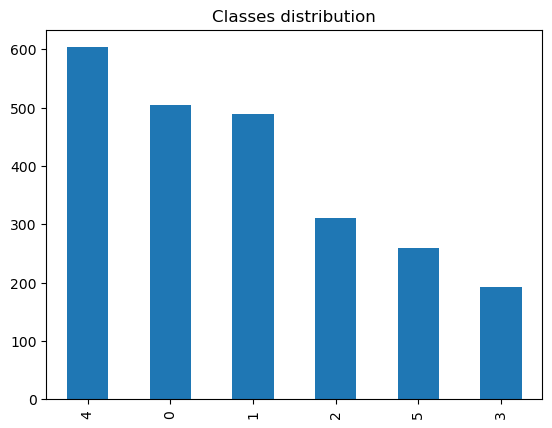

In [11]:
df['class_6'].value_counts().plot(kind='bar', title='Classes distribution')

Random Images from Dataset

In [12]:
number_random_images = 4
df_class = df.groupby('class_6')['image_id'].apply(set).reset_index()
df_class['num'] = df_class['image_id'].apply(len)
df_class['image_random'] = df_class['image_id'].apply(lambda x: random.sample(x, number_random_images))
df_class

/tmp/ipykernel_33/1708679663.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  df_class['image_random'] = df_class['image_id'].apply(lambda x: random.sample(x, number_random_images))


class_6                                           image_id  num  \
0        0  {4e6086e230726299328bae1ad75c7659.jpg, 1a80719...  505   
1        1  {86cfda1e78f7df8f6e100224660b7747.jpg, 1bcb713...  489   
2        2  {bb2803a898a9b4a6b739be701f2eca09.jpg, d2ee815...  310   
3        3  {62705a4ff869013ee7682fa0b49d6789.jpg, 6ba881f...  193   
4        4  {6016cccddde12a2f5659be3061c53abb.jpg, 381d9c0...  603   
5        5  {b185382ce58df8686d746cb3a20ccc98.jpg, 657e40b...  260   

                                        image_random  
0  [168e25c975e24ba90ded8cc363a7ce50.jpg, 66158c3...  
1  [ab920997e7f46f93a729802377376b80.jpg, 5d52298...  
2  [01b6e4c7b1efffc25e9ce5633d526075.jpg, 1d2350d...  
3  [055d94ae3b745078492d994ac0a2a056.jpg, 7fd5b0d...  
4  [c13b7fd0c3c92b453f3d33d9f51acb95.jpg, a34a900...  
5  [779a111d4095385ec2d1995b347133d3.jpg, 0497431...

In [13]:
def show_grid(img_list, img_class):
    fig = plt.figure(figsize=(16., 16.))
    grid = ImageGrid(fig, 111, nrows_ncols=(2, 2), axes_pad=0.2)

    for ax, img in zip(grid, img_list):
        ax.imshow(Image.open(url_base+img))
        ax.set_title(img)

    fig.suptitle('Class # {}'.format(img_class), fontsize=28, y=.925)
    plt.show()
    
# show_grid(df_class['image_random'].iloc[0], 0)

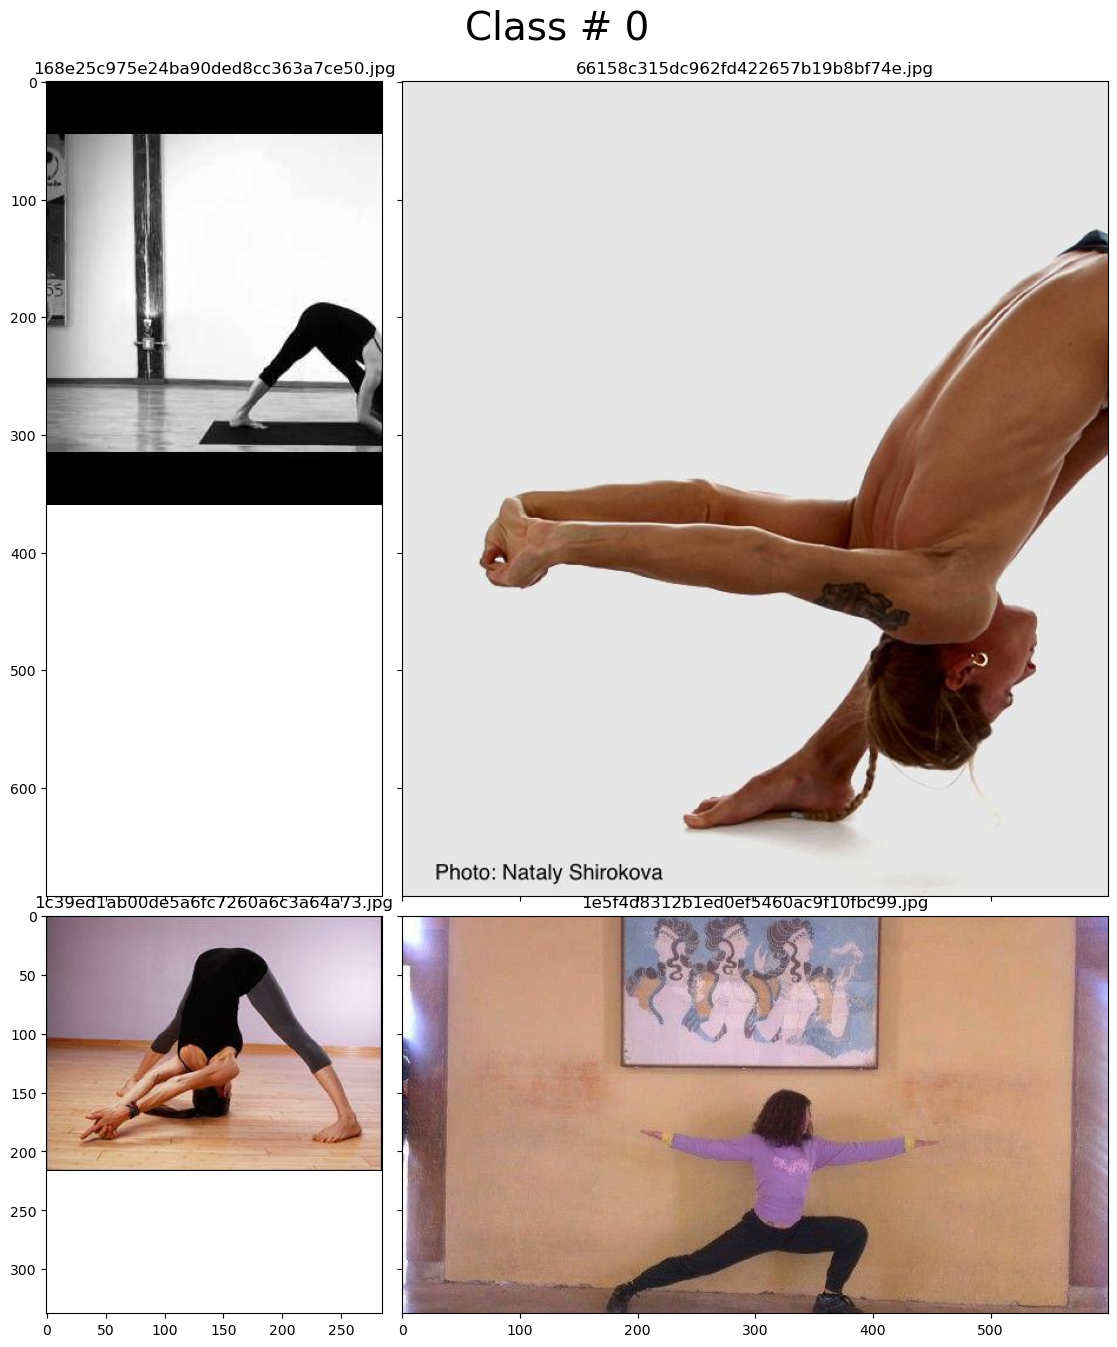

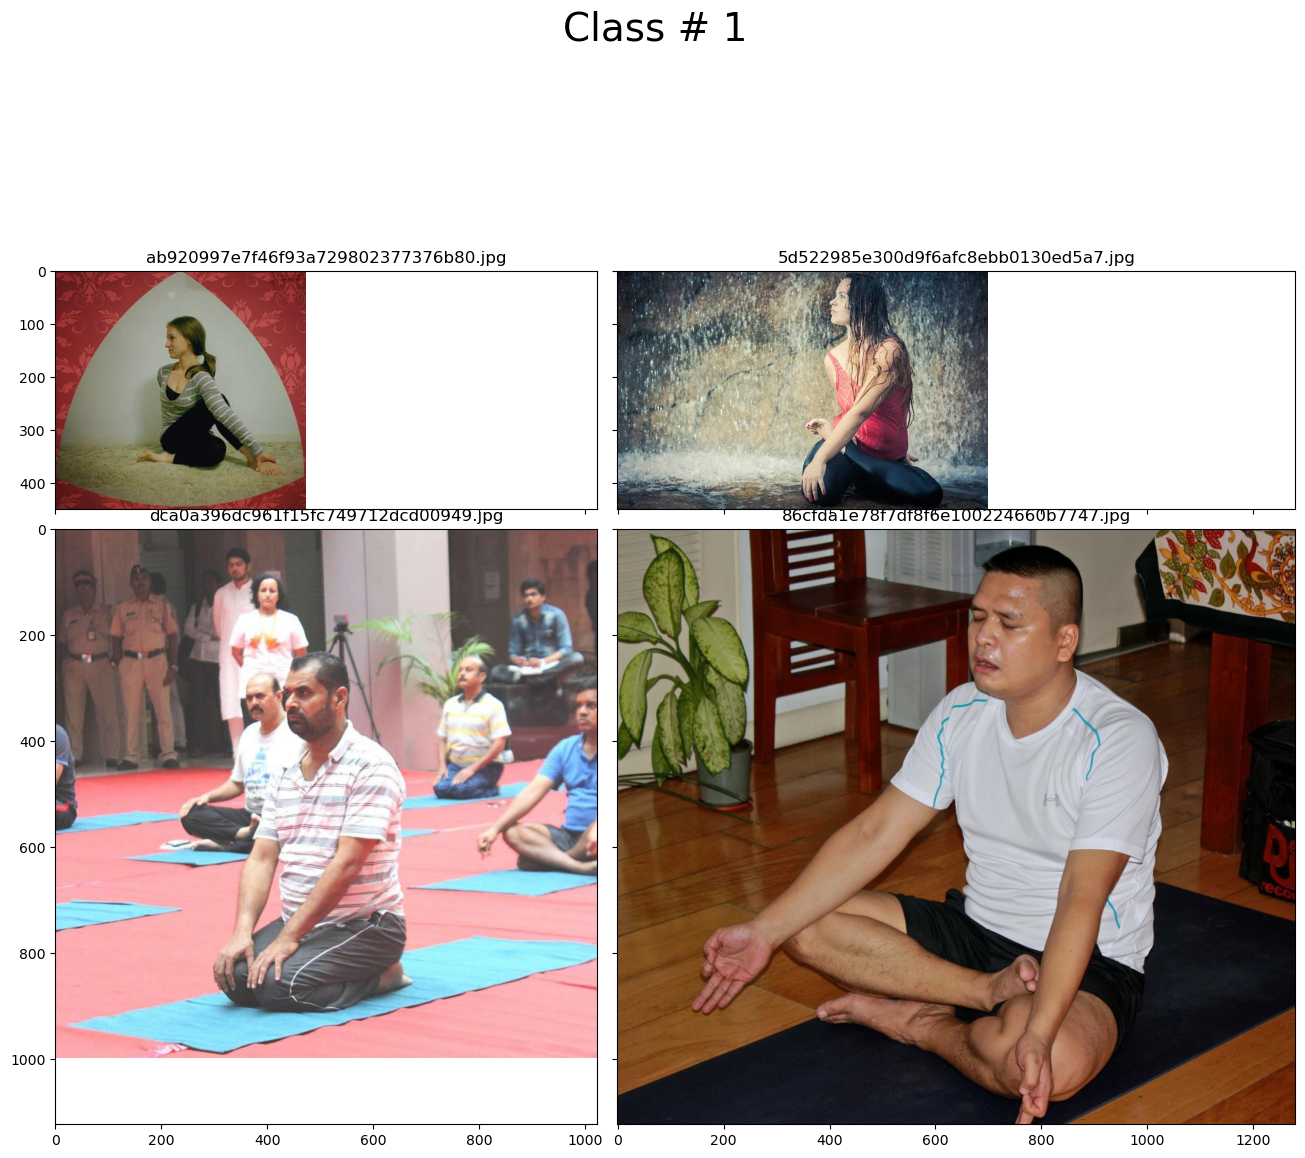

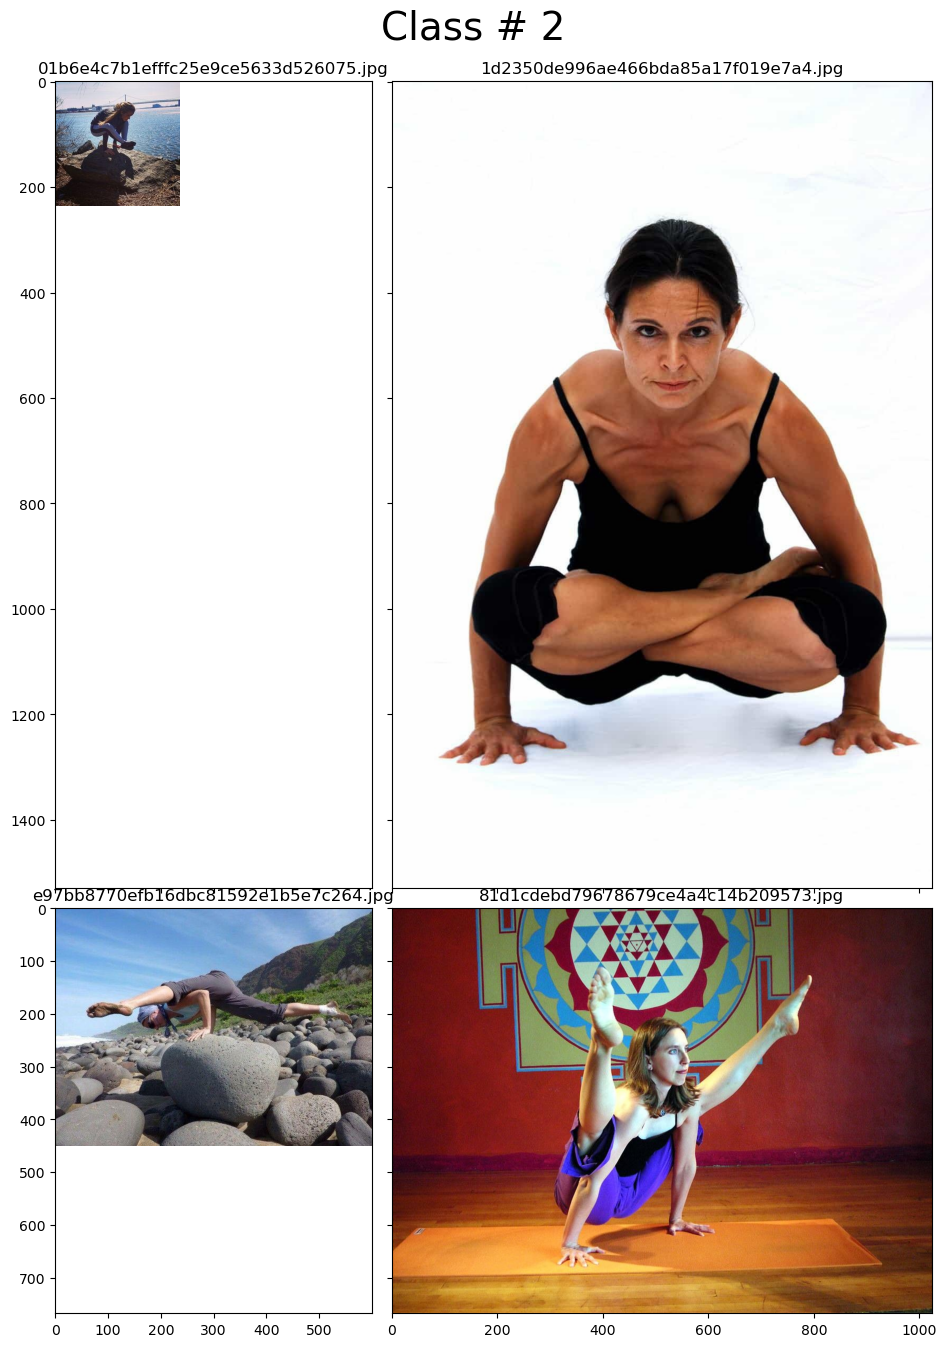

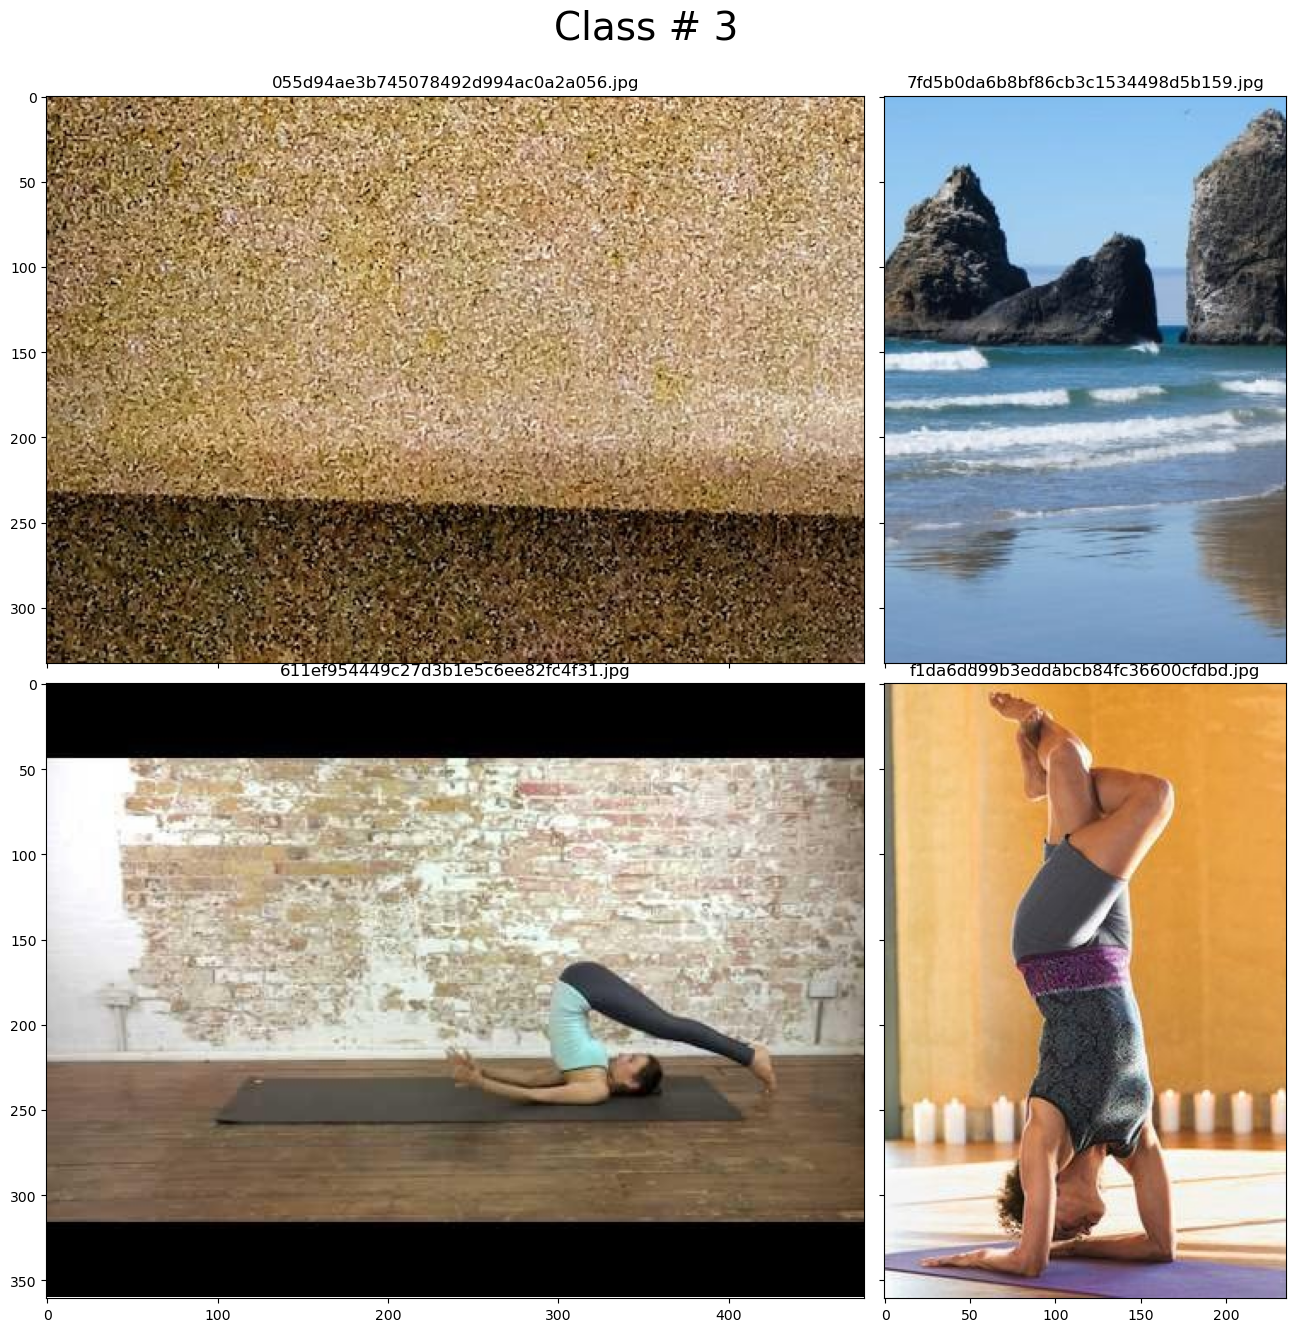

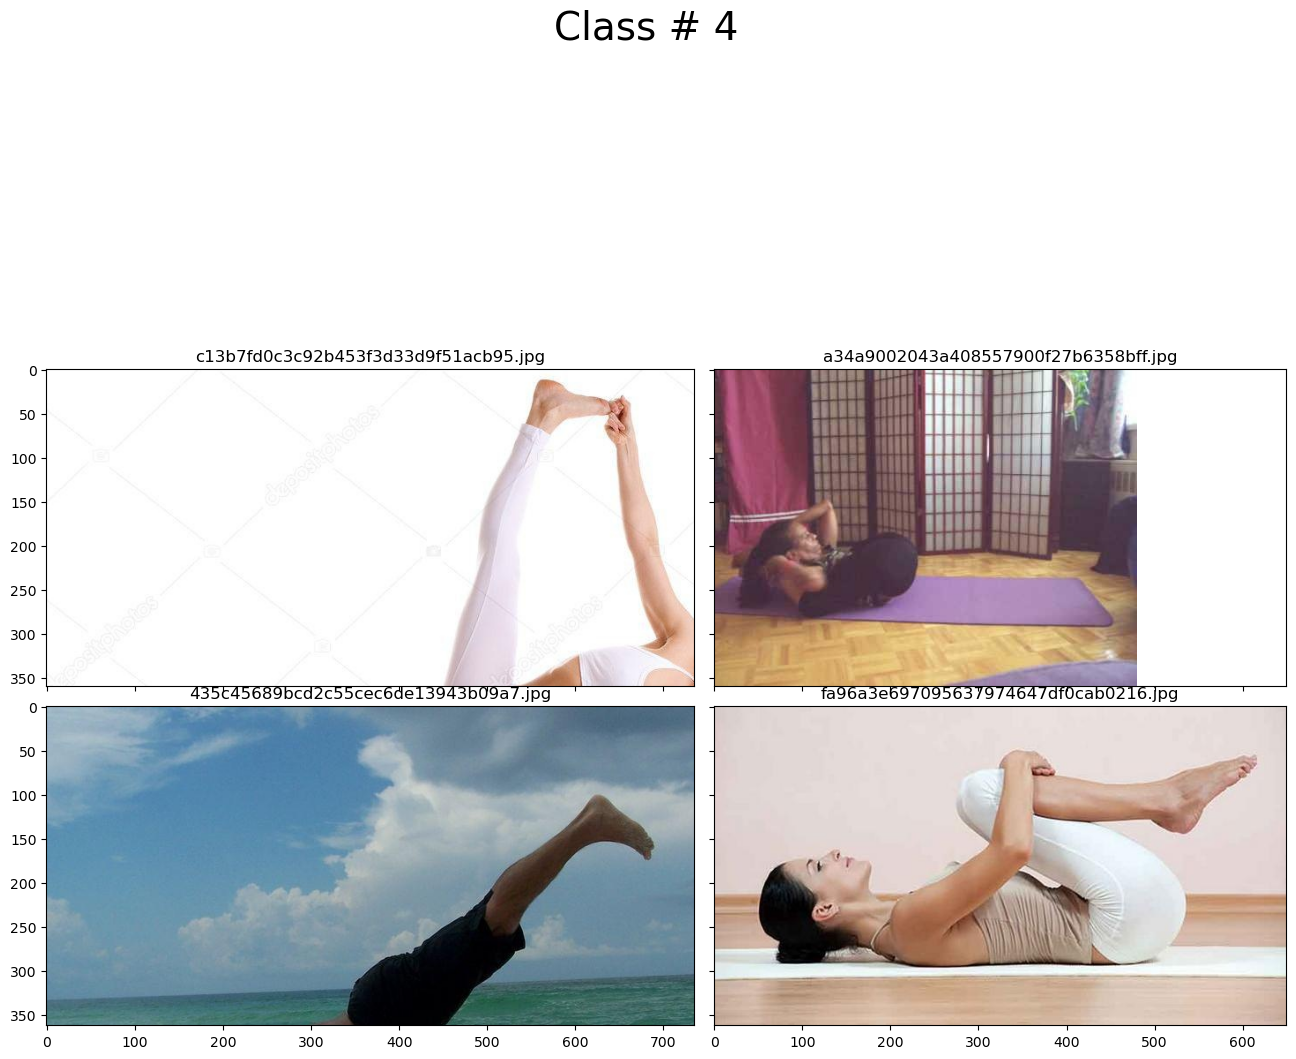

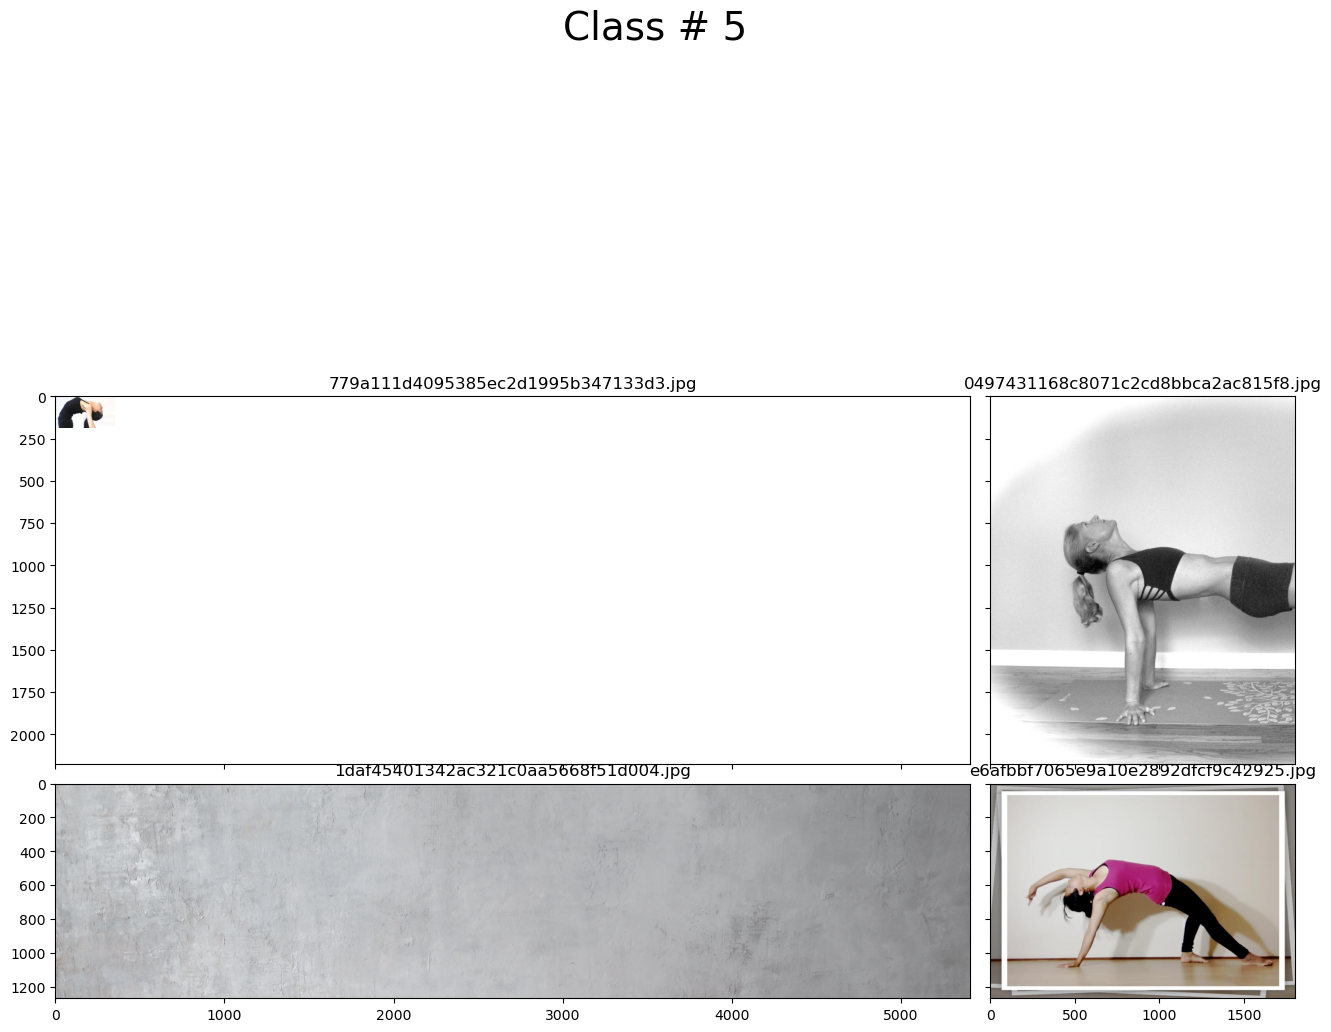

In [14]:
for i, row in df_class.iterrows():
    show_grid(row['image_random'], row['class_6'])
    print()

In [14]:
train_datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # Randomly apply shear transformations
    zoom_range=0.2,         # Randomly zoom inside pictures
    fill_mode='nearest',    # The strategy used for filling in newly created pixels
    rescale=1./255,         # Rescale image values to [0,1]
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

if tf.test.is_gpu_available():
    print("TensorFlow can use the GPU!")
    print("GPU Name:", tf.test.gpu_device_name())
else:
    print("TensorFlow cannot use the GPU.")

Num GPUs Available:  0
TensorFlow cannot use the GPU.


In [16]:
# Directory path 
#url_base = '/kaggle/input/ukraine-ml-bootcamp-2023/images/train_images/'
df['class_6'] = df['class_6'].astype(str)

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


# Train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=url_base,
    x_col='image_id',
    y_col='class_6',
    batch_size=32,
    shuffle=True,
    class_mode='categorical',  # Since class_6 is an integer label (0 to 5)
    target_size=(150, 150)  # Adjust the target size to the size of your input images
)

# Validation generator
val_generator = validation_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=url_base,
    x_col='image_id',
    y_col='class_6',
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    # color_mode='grayscale',
    target_size=(150, 150)
)

Found 1888 validated image filenames belonging to 6 classes.
Found 472 validated image filenames belonging to 6 classes.


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


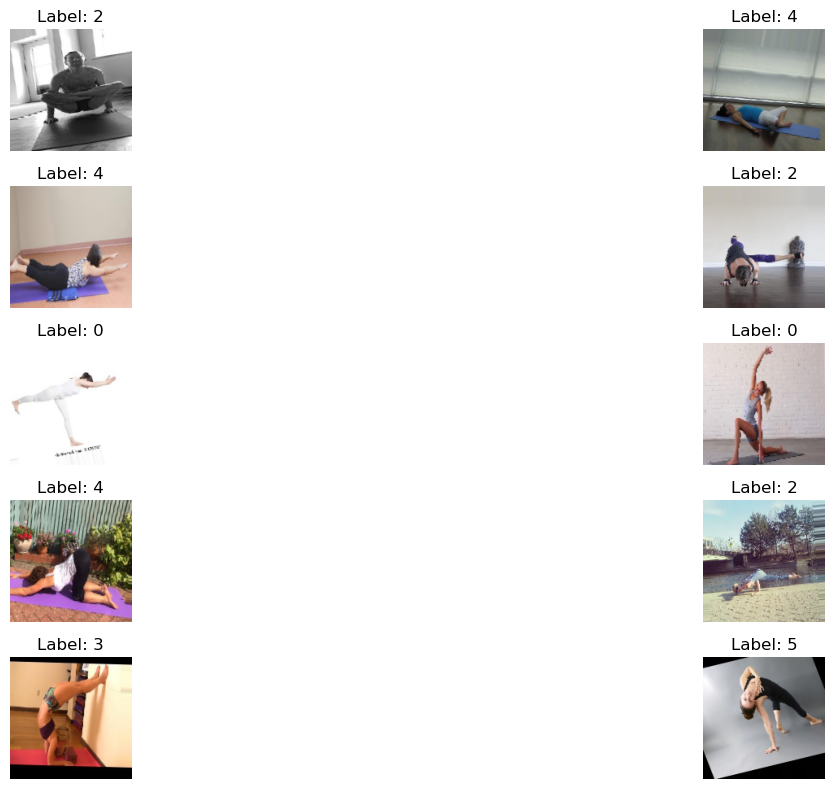

In [17]:
print(train_generator.class_indices)
num_images = 10
images_batch, labels_batch = next(train_generator)
# Set the number of rows and columns for your grid
num_rows = 5
num_cols = 2

# Increase the figure size for larger images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8)) 

batch_start_idx = train_generator.batch_index * train_generator.batch_size

for i in range(num_images):
    row_idx = i // num_cols  # Integer division to get row index
    col_idx = i % num_cols  # Remainder to get column index
    
    ax = axes[row_idx, col_idx]

    # Get image, label, and filename
    image = images_batch[i]
    label = labels_batch[i]
    # Display the image and its label
    ax.imshow(image)
    ax.set_title(f"Label: {np.argmax(label)}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [19]:
def micro_f1_score(y_true, y_pred):
    # Convert predictions to one-hot vectors
    y_pred = K.one_hot(K.argmax(y_pred), num_classes=6)

    # Calculate true positives, false positives, and false negatives over all classes
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    # Micro-average precision and recall
    micro_precision = K.sum(tp) / (K.sum(tp + fp) + K.epsilon())
    micro_recall = K.sum(tp) / (K.sum(tp + fn) + K.epsilon())

    # Calculate micro-averaged F1-score
    micro_f1 = 2 * micro_precision * micro_recall / (micro_precision + micro_recall + K.epsilon())

    return micro_f1